Laboratory #3: Linear Algebra
=============================
Grace Yung

#Contents

- [List of Problems](#List-of-Problems)
- [1. Introduction](#1.-Introduction)
  * [1.1 Objectives](#1.1-Objectives)
  * [1.2 Prerequisites](#1.2-Prerequisites)
- [2. Linear Systems](#2.-Linear-Systems)
  * [2.1 What is a Matrix](#2.1-What-is-a-Matrix)
  * [2.2 Quick Review](#2.2-Quick-Review)
  * [2.3 Gaussian Elimination](#2.3-Gaussian-Elimination)
    + [2.3.1 Decomposition](#2.3.1-Decomposition)
  * [2.4 Round-off Error](#2.4-Round-off-Error)
    + [2.4.1 Partial Pivoting](#2.4.1-Partial-Pivoting)
    + [2.4.2 Full Pivoting](#2.4.2-Full-Pivoting)
    + [2.4.3 Summary](#2.4.3-Summary)
  * [2.5 Matrix Inversion](#2.5-Matrix-Inversion)
  * [2.6 Determinant](#2.6-Determinant)
  * [2.7 Computational cost of Gaussian elimination](#2.7-Computational-cost-of-Gaussian-elimination)
- [3. Eigenvalue Problems](#3.-Eigenvalue-Problems)
  * [3.1 Characteristic Equation](#3.1-Characteristic-Equation)
    + [3.1.1 Condition Number](#3.1.1-Condition-Number)
  * [3.2 Eigenvectors](#3.2-Eigenvectors)
- [4. Iterative Methods](#4.-Iterative-Methods)
- [5. Solution of an ODE Using Linear Algebra](#5.-Solution-of-an-ODE-Using-Linear-Algebra)
- [References](#References)
- [Using Numpy and Python for Matrices](#Numpy-and-Python-with-Matrices)
- [Glossary](#Glossary)

#List of Problems

- [Problem One](#Problem-One): Pollution Box Model
- [Problem Two](#Problem-Two): Condition number for Dirichlet problem
- [Problem Three](#Problem-Three): Condition number for Neumann problem
- [Problem Four](#Problem-Four): Condition number for periodic problem

1. Introduction
============

1.1 Objectives
----------

The object of this lab is to familiarize you with some of the common
techniques used in linear algebra. You can use the Python software
package to solve some of the problems presented in the lab. There are
examples of using the Python commands as you go along in the lab. In
particular, after finishing the lab, you will be able to

-   Define: condition number, ill-conditioned matrix, singular matrix,
    LU decomposition, Dirichlet, Neumann and periodic boundary
    conditions.

-   Find by hand or using Python: eigenvalues, eigenvectors, transpose,
    inverse of a matrix, determinant.

-   Find using Python: condition numbers.

-   Explain: pivoting.

There is a description of using Numpy and Python for Matrices at the end of the lab. It includes a brief description of how to use the built-in functions introduced in
this lab. Just look for the paw prints:


###[<span style='font-size:7em'>&#x1F43E;</span>  Numpy and Python with Matrices](#Numpy-and-Python-with-Matrices)###

when you are not sure what
functions to use, and this will lead you to the mini-manual.

1.2 Prerequisites
-------------

You should have had an introductory course in linear algebra.

In [1]:
# import the quiz script
from numlabs.lab3 import quiz3
# import image handling
from IPython.display import Image

2. Linear Systems
==============

In this section, the concept of a matrix will be reviewed. The basic
operations and methods in solving a linear system are introduced as
well.

Note: **Whenever you see a term you are not familiar with, you can find
a definition in the [glossary](#Glossary).**

2.1 What is a Matrix
----------------

Before going any further on how to solve a linear system, you need to
know what a linear system is. A set of m linear equations with n
unknowns: 

<div id='lab3:eq:system'>
(System of Equations)
$$\begin{array}{ccccccc}
a_{11}x_{1} & + & \ldots & + & a_{1n}x_{n} & = & b_{1} \\
a_{21}x_{1} & + & \ldots & + & a_{2n}x_{n} & = & b_{2} \\
            &   & \vdots &   &             &   & \vdots \\
a_{m1}x_{1} & + & \ldots & + & a_{mn}x_{n} & = & b_{m}
\end{array}
$$
</div>

can be represented as an augmented matrix:

$$\left[
\begin{array}{cc}
        \begin{array}{ccccc}
                a_{11} & & \ldots & & a_{1n} \\
                \vdots & & \ddots & & \vdots \\
                a_{m1} & & \ldots & & a_{mn}
        \end{array}
&
        \left|
        \begin{array}{rc}
                & b_{1} \\ & \vdots \\ & b_{m}
        \end{array}
        \right.
\end{array}
\right]$$

Column 1 through n of this matrix contain the coefficients $a_{ij}$ of
the unknowns in the set of linear equations. The right most column is
the *augmented column*, which is made up of the coefficients of the
right hand side $b_i$.

##Quiz on Matrices
Which matrix matches this system of equations?
<div id="quiz:sys">
$$\begin{array}{lcr}
2x + 3y + 6z &=& 19\\
3x + 6y + 9z &=& 21\\
x + 5y + 10z &=& 0
\end{array}$$
</div>
(A)
$$\left[ \begin{array}{ccc}
2 & 3 & 1 \\
3 & 6 & 5 \\
6 & 9 & 10\\
19 & 21 & 0
\end{array}
\right]$$
(B)
$$\left[ \begin{array}{ccc}
2 & 3 & 6\\
3 & 6 & 9\\
1 & 5 & 10
\end{array}
\right]$$
(C)
$$\left[ \begin{array}{ccc|c}
1 & 5 & 10 & 0\\
2 & 3 & 6 & 19\\
3 & 6 & 9 & 21
\end{array}
\right]$$
(D)
$$\left[ \begin{array}{ccc|c}
2 & 3 & 6 & -19\\
3 & 6 & 9 & -21\\
1 & 5 & 10 & 0 
\end{array}
\right]$$

In the following, replace 'x' by 'A', 'B', 'C', or 'D' and run the cell.

In [2]:
print (quiz3.matrix_quiz(answer = 'x'))

Acceptable answers are 'A', 'B', 'C' or 'D'


##2.2 Quick Review

[lab3:sec:quick]: (#Quick-Review)

Here is a review on the basic matrix operations, including addition,
subtraction and multiplication. These are important in solving linear
systems.

Here is a short exercise to see how much you remember:

Let $x = \left[ \begin{array}{r} 2 \\ 2 \\ 7 \end{array} \right] , 
     y = \left[ \begin{array}{r} -5 \\ 1 \\ 3 \end{array} \right] , 
     A = \left[ \begin{array}{rrr}  3 & -2 & 10 \\  
                                   -6 &  7 & -4 
                      \end{array} \right],
     B = \left[ \begin{array}{rr} -6 & 4 \\ 7 & -1 \\ 2 & 9 
                \end{array} \right]$.

Calculate the following:

1.  $x + y$

2.  $x^{T}y$

3.  $y-x$

4.  $Ax$

5.  $y^{T}A$

6.  $AB$

7.  $BA$

8.  $AA$

The solutions to these exercises are available [here](http://clouds.eos.ubc.ca/~phil/numeric/labs/lab3/lab3_files/quizzes/quick/quick.html)

After solving the questions by hand, you can also use Python to check
your answers.

<div align='right'>
<span style='font-size:7em'>
[&#x1F43E;](#Numpy-and-Python-with-Matrices)</span>
</div>


2.3 Gaussian Elimination
--------------------
[lab3:sec:gaus]: (#2.3-Gaussian-Elimination)

The simplest method for solving a linear system is Gaussian elimination,
which uses three types of *elementary row operations*:

-   Multiplying a row by a non-zero constant ($kE_{ij}$)

-   Adding a multiple of one row to another ($E_{ij} + kE_{kj}$)

-   Exchanging two rows ($E_{ij} \leftrightarrow E_{kj}$)

Each row operation corresponds to a step in the solution of the [System
of Equations](#lab3:eq:system) where the equations are combined
together. *It is important to note that none of those operations changes
the solution.* There are two parts to this method: elimination and
back-substitution. The purpose of the process of elimination is to
eliminate the matrix entries below the main diagonal, using row
operations, to obtain a upper triangular matrix with the augmented
column. Then, you will be able to proceed with back-substitution to find
the values of the unknowns.

Try to solve this set of linear equations:

$$\begin{array}{lrcrcrcr}
        E_{1j}: & 2x_{1} & + & 8x_{2} & - & 5x_{3} & = & 53 \\
        E_{2j}: & 3x_{1} & - & 6x_{2} & + & 4x_{3} & = & -48 \\
        E_{3j}: & x_{1} & + & 2x_{2} & - & x_{3} & = & 13
\end{array}$$

The solution to this problem is available [here](http://clouds.eos.ubc.ca/~phil/numeric/html_files/lab3_files/quizzes/gaus/gaus.html)

After solving the system by hand, you can use Python to check your
answer.

<div align='right'>
<span style='font-size:7em'>
[&#x1F43E;](#Numpy-and-Python-with-Matrices)</span>
</div>


###2.3.1 Decomposition 
[lab3:sec:decomp]: (#2.3.1-Decomposition)

Any invertible, square matrix, $A$, can be factored out into a product
of a lower and an upper triangular matrices, $L$ and $U$, respectively,
so that $A$ = $LU$. The $LU$- *decomposition* is closely linked to the
process of Gaussian elimination.

*Example One*
------------

> Using the matrix from the system of the previous section (Sec
[2.3 Gaussian Elimination](#2.3-Gaussian-Elimination)), we have:

> $$A = \left[ \begin{array}{rrr}  2 &  8 & -5  \\
                                  3 & -6 &  4  \\
                                  1 &  2 & -1  \end{array}  \right]$$

> The upper triangular matrix $U$ can easily be calculated by applying
Gaussian elimination to $A$:

> $$\begin{array}{cl}
   \begin{array}{c}   E_{2j}-\frac{3}{2}E_{1j}  \\
                      E_{3j}-\frac{1}{2}E_{1j}  \\
                      \rightarrow   \end{array}
 & 
   \left[  \begin{array}{rrr}   2 &   8 & -5   \\
                                0 & -18 & \frac{23}{2}  \\
                                0 &  -2 & \frac{3}{2} 
           \end{array}    \right]  \\   \\
   \begin{array}{c}   E_{3j}-\frac{1}{9}E_{2j} \\
                      \rightarrow    \end{array}
 &
   \left[  \begin{array}{rrr}   2 &   8 & -5   \\
                                0 & -18 & \frac{23}{2} \\
                                0 &   0 & \frac{2}{9}
           \end{array}   \right]  = U
\end{array}$$

> Note that there is no row exchange.

> The lower triangular matrix $L$ is calculated with the steps which lead
us from the original matrix to the upper triangular matrix, i.e.:

> $$\begin{array}{c}      E_{2j}-\frac{3}{2}E_{1j}  \\ \\
                         E_{3j}-\frac{1}{2}E_{1j}  \\ \\
                         E_{3j}-\frac{1}{9}E_{2j} 
\end{array}$$

> Note that each step is a multiple $\ell$ of equation $m$ subtracted from
equation $n$. Each of these steps, in fact, can be represented by an
elementary matrix. $U$ can be obtained by multiplying $A$ by this
sequence of elementary matrices.

> Each of the elementary matrices is composed of an identity matrix the
size of $A$ with $-\ell$ in the ($m,n$) entry. So the steps become:

> $$\begin{array}{ccc}  
    E_{2j}-\frac{3}{2}E_{1j}  &  
    \rightarrow &
    \left[  \begin{array}{rcc}   1 & 0 & 0  \\
                      -\frac{3}{2} & 1 & 0  \\
                                 0 & 0 & 1
    \end{array}   \right]  = R \\   \\
    E_{3j}-\frac{1}{2}E_{1j}  &
    \rightarrow &
    \left[  \begin{array}{rcc}   1 & 0 & 0  \\
                                 0 & 1 & 0  \\
                      -\frac{1}{2} & 0 & 1 
    \end{array}   \right]  = S \\   \\
    E_{3j}-\frac{1}{9}E_{2j}  &
    \rightarrow &
    \left[  \begin{array}{crc}  1 & 0 & 0 \\
                                0 & 1 & 0  \\
                                0 & -\frac{1}{9} & 1
    \end{array}   \right]  = T
\end{array}$$

> and $TSRA$ = $U$. Check this with Python.

> To get back from $U$ to $A$, the inverse of $R$, $S$ and $T$ are
multiplied onto $U$:

> $$\begin{array}{rcl}
          T^{-1}TSRA & = & T^{-1}U  \\
           S^{-1}SRA & = & S^{-1}T^{-1}U  \\ 
            R^{-1}RA & = & R^{-1}S^{-1}T^{-1}U \\
\end{array}$$

> So $A$ = $R^{-1}S^{-1}T^{-1}U$. Recall that $A$ = $LU$. If
$R^{-1}S^{-1}T^{-1}$ is a lower triangular matrix, then it is $L$.

> The inverse of the elementary matrix is the same matrix with only one
difference, and that is, $\ell$ is in the $a_{mn}$ entry instead of
$-\ell$. So:

> $$\begin{array}{rcl}
      R^{-1} & = & \left[ \begin{array}{rrr} 1 & 0 & 0 \\
                                   \frac{3}{2} & 1 & 0 \\
                                             0 & 0 & 1
                          \end{array}   \right]       \\  \\
      S^{-1} & = & \left[ \begin{array}{rrr} 1 & 0 & 0 \\
                                             0 & 1 & 0 \\
                                   \frac{1}{2} & 0 & 1
                          \end{array}   \right]       \\  \\
      T^{-1} & = & \left[ \begin{array}{rrr} 1 & 0 & 0 \\
                                             0 & 1 & 0 \\
                                   0 & \frac{1}{9} & 1
                          \end{array}   \right] 
\end{array}$$

> Multiplying $R^{-1}S^{-1}T^{-1}$ together, we have:

> $$\begin{array}{rcl}  R^{-1}S^{-1}T^{-1} 
   & = &
   \left[ \begin{array}{ccc}    1 &           0 & 0 \\
                      \frac{3}{2} &           1 & 0  \\
                      \frac{1}{2} & \frac{1}{9} & 1
   \end{array}   \right]  = L
\end{array}$$

> So $A$ is factored into two matrices $L$ and $U$, where

> $$\begin{array}{ccc}
    L = \left[  \begin{array}{ccc}    1 &           0 & 0 \\
                            \frac{3}{2} &           1 & 0  \\
                            \frac{1}{2} & \frac{1}{9} & 1
                \end{array}  \right]
& \mbox{ and } &
    U = \left[  \begin{array}{ccc}  2 &   8 & -5   \\
                                    0 & -18 & \frac{23}{2} \\
                                    0 &   0 & \frac{2}{9}
                \end{array}  \right]
\end{array}$$

> Use Python to confirm that $LU$ = $A$.

The reason decomposition is introduced here is not because of Gaussian
elimination $-$ one seldom explicitly computes the $LU$ decomposition of
a matrix. However, the idea of factoring a matrix is important for other
direct methods of solving linear systems (of which Gaussian elimination
is only one) and for methods for finding eigenvalues ([Section 3.1](#3.1-Characteristic-Equation)).

<div align='right'>
<span style='font-size:5em'>
[&#x1F43E;](#Numpy-and-Python-with-Matrices)</span>
</div>


2.4 Round-off Error
---------------
[lab3:sec:round-off-error]: (#2.4-Round-off-Error)

When a number is represented in its floating point form, i.e. an
approximation of the number, the resulting error is the *round-off
error*. The floating-point representation of numbers  and the consequent
effects of round-off error were discussed already in Lab \#2.

When round-off errors are present in the matrix $A$ or the right hand
side $b$, the linear system $Ax = b$ may or may not give a solution that
is close to the real answer. When a matrix $A$ “magnifies” the effects
of round-off errors in this way, we say that $A$ is an ill-conditioned
matrix.

*Example Two*
------------
[lab3:eg:round]: (#Example-Two)

> Let’s see an example:

> Suppose

> $$A = \left[ \begin{array}{cc} 1 & 1 \\ 1 & 1.0001 
              \end{array} \right]$$

> and consider the system:

> <div id='lab3:eq:illbefore'>
(Ill-conditioned version one):
 $$\left[ \begin{array}{cc}
   \begin{array}{cc}   1 & 1 \\  1 & 1.0001  \end{array} 
&
   \left| \begin{array}{c}  2 \\ 2 \end{array}  \right]
\end{array}   \right.
$$
</div>

> The condition number, $K$, of a matrix, defined in [Section 3.1.1 Condition Number](#3.1.1-Condition-Number), is a measure of how well-conditioned a matrix is. If
$K$ is large, then the matrix is ill-conditioned, and Gaussian
elimination will magnify the round-off errors. The condition number of
$A$ is 40002. You can use Python to check this number.

> The solution to this is $x_1$ = 2 and $x_2$ = 0. However, if the system
is altered a little as follows:

> <div id='lab3:eq:illafter'>
(Ill-conditioned version two):
 $$\left[ \begin{array}{cc}
   \begin{array}{cc}   1 & 1 \\  1 & 1.0001  \end{array}
&
   \left| \begin{array}{c}  2 \\ 2.0001 \end{array}  \right]
\end{array}   \right.
$$
</div>

> Then, the solution becomes $x_1$ = 1 and $x_2$ = 1. A change in the
fifth significant digit was amplified to the point where the solution is
not even accurate to the first significant digit. $A$ is an
ill-conditioned matrix. You can set up the systems [Ill-conditioned version one](#lab3:eq:illbefore)
and [Ill-conditioned version two](#lab3:eq:illafter) in Python, and check the answers yourself.

*Example Three*
--------------
[lab3:eg:inacc]: (#Example-Three) 

> Use Python to try the following example. First solve the
system $A^{\prime}x = b$; then solve $A^{\prime}x = b2$. Find the
condition number of $A^{\prime}$.

>$$\begin{array}{ccccc}
A^{\prime} = \left[ \begin{array}{cc} 0.0001 & 1  \\ 1 & 1 
             \end{array}   \right]
& , & 
b = \left[ \begin{array}{c} 1 \\ 2  \end{array}  \right]
& \mbox{and} &
b2 = \left[ \begin{array}{c} 1 \\ 2.0001  \end{array}  \right] .
\end{array}$$

> You will find that the solution for $A^{\prime}x = b$ is $x_1$ = 1.0001
and $x_2$ = 0.9999, and the solution for $A^{\prime}x = b2$ is $x_1$ =
1.0002 and $x_2$ = 0.9999 . So a change in $b$ did not result in a large
change in the solution. Therefore, $A^{\prime}$ is a well-conditioned
matrix. In fact, the condition number is approximately 2.6.

> Nevertheless, even a well conditioned system like $A^{\prime}x =
b$ leads to inaccuracy if the wrong solution method is used, that is, an
algorithm which is sensitive to round-off error. If you use Gaussian
elimination to solve this system, you might be misled that $A^{\prime}$
is ill-conditioned. Using Gaussian elimination to solve $A^{\prime}x=b$:

> $$\begin{array}{cl}
&  \left[
\begin{array}{cc}
     \begin{array}{cc}  0.0001 & 1 \\  1 & 1  \end{array}  
&
     \left|
     \begin{array}{c}  1 \\ 2  \end{array}  \right]
\end{array}  \right.  \\  \\
\begin{array}{c}  10,000E_{1j} \\ \rightarrow \end{array}  &
\left[
\begin{array}{cc}
     \begin{array}{cc}  1 & 10,000 \\  1 & 1  \end{array}  
&
     \left|
     \begin{array}{c}  10,000 \\ 2  \end{array}  \right]
\end{array}  \right.  \\  \\
\begin{array}{c}  E_{2j}-E_{1j} \\ \rightarrow \end{array} &
\left[
\begin{array}{cc}
     \begin{array}{cc}  1 & 10,000  \\  0 & -9,999  \end{array}  
&
     \left|
     \begin{array}{c}  10,000 \\ -9,998  \end{array}  \right]
\end{array}  \right.
\end{array}$$

> At this point, if you continue to solve the system as is, you will get
the expected answers. You can check this with Python. However, if you
make changes to the matrix here by rounding -9,999 and -9,998 to -10,000, 
the final answers will be different:

> $$\begin{array}{cl}
& \left[
\begin{array}{cc}
     \begin{array}{cc}  1 & 10,000  \\  0 & -10,000  \end{array}
&
     \left|
     \begin{array}{c}  10,000 \\ -10,000  \end{array}  \right]
\end{array}  \right. 
\end{array}$$

> The result is $x_1$ = 0 and $x_2$ = 1, which is quite different from the
correct answers. So Gaussian elimination might mislead you to think that
a matrix is ill-conditioned by giving an inaccurate solution to the
system. In fact, the problem is that Gaussian elimination on its own is
a method that is unstable in the presence of round-off error, even for
well-conditioned matrices. Can this be fixed?

> You can try the example with Python.

<div align='right'>
<span style='font-size:7em'>
[&#x1F43E;](#Numpy-and-Python-with-Matrices)</span>
</div>



### 2.4.1 Partial Pivoting

There are a number of ways to avoid inaccuracy, one of which is applying
partial pivoting to the Gaussian elimination.


Consider the example from the previous section. In order to avoid
multiplying by 10,000, another pivot is desired in place of 0.0001. The
goal is to examine all the entries in the first column, find the entry
that has the largest value, and exchange the first row with the row that
contains this element. So this entry becomes the pivot. This is partial
pivoting. Keep in mind that switching rows is an elementary operation
and has no effect on the solution.


In the original Gaussian elimination algorithm, row exchange is done
only if the pivot is zero. In partial pivoting, row exchange is done so
that the largest value in a certain column is the pivot. This helps to
reduce the amplification of round-off error.

*Example Four*
--------------

> In the matrix $A^{\prime}$ from [Example Two](#Example-Two), 0.0001 from
column one is the first pivot. Looking at this column, the entry, 1, in
the second row is the only other choice in this column. Obviously, 1 is
greater than 0.0001. So the two rows are exchanged.

> $$\begin{array}{cl}
   & \left[ \begin{array}{cc}
            \begin{array}{cc}  0.0001 & 1 \\  1 & 1  \end{array} 
        &   \left|
            \begin{array}{c}   1 \\ 2  \end{array} \right]
   \end{array}  \right. \\   \\
   \begin{array}{c} E_{1j} \leftrightarrow E_{2j} \\  \rightarrow
   \end{array}
   &  \left[ \begin{array}{cc}
          \begin{array}{cc}  1 & 1 \\  0.0001 & 1  \end{array} 
       &  \left|
          \begin{array}{c}   2 \\ 1  \end{array} \right]   
   \end{array}  \right.  \\  \\
   \begin{array}{c}  E_{2j}-0.0001E_{1j} \\ \rightarrow \end{array} 
   & \left[ \begin{array}{cc}
            \begin{array}{cc}  1 & 1 \\  0 & 0.9999  \end{array} 
        &   \left|
           \begin{array}{c}   2 \\ 0.9998  \end{array} \right]
   \end{array}  \right.
\end{array}$$

> The same entries are rounded off:

> $$\begin{array}{cl}
   & \left[  \begin{array}{cc}
             \begin{array}{cc}  1 & 1 \\ 0 & 1  \end{array}
      &
             \left|
             \begin{array}{c}  2 \\ 1  \end{array}  \right]
   \end{array}   \right. \\  \\
   \begin{array}{c}  E_{1j}-E_{2j}  \\  \rightarrow  \end{array}
   & \left[  \begin{array}{cc}
             \begin{array}{cc}  1 & 0  \\ 0 & 1 \end{array}
      &
             \left|
             \begin{array}{c} 1 \\ 1 \end{array}  \right]
   \end{array}   \right.
\end{array}$$

> So the solution is $x_1$ = 1 and $x_2$ = 1, and this is a close
approximation to the original solution, $x_1$ = 1.0001 and $x_2$ =
0.9999.


> You can try the example with Python.

<div align='right'>
<span style='font-size:7em'>
[&#x1F43E;](#Numpy-and-Python-with-Matrices)</span>
</div>



Note: This section has described row pivoting. The same process can be
applied to columns, with the resulting procedure being called column
pivoting.

### 2.4.2 Full Pivoting

Another way to get around inaccuracy (Example [Three](#Example-Three)) is to
use Gaussian elimination with full pivoting. Sometimes, even partial
pivoting can lead to problems. With full pivoting, in addition to row
exchange, columns will be exchanged as well. The purpose is to use the
largest entries in the whole matrix as the pivots.

###*Example Five*

> Given the following:

> $$ \begin{array}{cccc}
&  A^{''} = \left[ \begin{array}{ccc} 0.0001 & 0.0001 & 0.5 \\
                                        0.5 &      1 & 1 \\
                                     0.0001 &      1 & 0.0001 
                             \end{array} 
                      \right]  
& \ \ \ &
b^{'} = \left[ \begin{array}{c} 1 \\ 0 \\ 1 
               \end{array} 
        \right]  \\ \\
\rightarrow &
\left[  \begin{array}{cc} 
                          \begin{array}{ccc}   0.0001 & 0.0001 & 0.5  \\
                                                  0.5 &      1 &  1   \\
                                               0.0001 &      1 & 0.0001
                          \end{array}
                    &  \left|   \begin{array}{c}  1 \\ 0 \\ 1 
                                \end{array} 
                       \right]
        \end{array}   
\right.  &  & 
\end{array}$$

> Use Python to find the condition number of $A^{''}$ and the solution to
this system.

> Looking at the system, if no rows are exchanged, then taking 0.0001 as
the pivot will magnify any errors made in the elements in column 1 by a
factor of 10,000. With partial pivoting, the first two rows can be
exchanged (as below):

> $$\begin{array}{cl}
\begin{array}{c} \\  E_{1j} \leftrightarrow E_{2j} \\ \rightarrow
\end{array} 
&   \begin{array}{ccccc}
         & x_1 & x_2 & x_3 &  \\
   \left[ \begin{array}{c} \\  \\  \\ \end{array} \right. 
   & \begin{array}{c} 0.5 \\ 0.0001 \\ 0.0001  \end{array} 
   & \begin{array}{c}   1 \\ 0.0001 \\ 1       \end{array}
   & \begin{array}{c}   1 \\    0.5 \\ 0.0001  \end{array} 
   & \left|  \begin{array}{c}   0 \\ 1 \\ 1  \end{array} \right]
   \end{array}
\end{array} $$ 


> and the magnification by 10,000 is avoided. Now the matrix will be
expanded by a factor of 2. However, if the entry 1 is used as the pivot,
then the matrix does not need to be expanded by 2 either. The only way
to put 1 in the position of the first pivot is to perform a column
exchange between columns one and two, or between columns one and three.
This is full pivoting.

> Note that when columns are exchanged, the variables represented by the
columns are switched as well, i.e. when columns one and two are
exchanged, the new column one represents $x_2$ and the new column two
represents $x_1$. So, we must keep track of the columns when performing
column pivoting.

>So the columns one and two are exchanged, and the matrix becomes:

> $$\begin{array}{cl}
\begin{array}{c} \\ E_{i1} \leftrightarrow E_{i2} \\ \rightarrow
\end{array}
&    \begin{array}{ccccc}
          & x_2 & x_1 & x_3 &  \\
          \left. \begin{array}{c} \\  \\  \\ \end{array} \right[
     & \begin{array}{c}   1 \\ 0.0001 \\      1  \end{array}
     & \begin{array}{c} 0.5 \\ 0.0001 \\ 0.0001  \end{array} 
     & \begin{array}{c}   1 \\    0.5 \\ 0.0001  \end{array}  
     & \left|  \begin{array}{c}   0 \\ 1 \\ 1  \end{array} \right]
\end{array}  \\    \\
\begin{array}{c}  \\ E_{2j}-0.0001E_{1j} \\ E_{3j}-E_{1j} \\ \rightarrow
\end{array}
&    \begin{array}{ccccc}
         & x_2 & x_1 & x_3 &  \\
          \left. \begin{array}{c} \\  \\  \\ \end{array} \right[
     & \begin{array}{c}   1 \\       0 \\      0  \end{array}
     & \begin{array}{c} 0.5 \\ 0.00005 \\ -0.4999  \end{array}
     & \begin{array}{c}   1 \\  0.4999 \\ -0.9999  \end{array}
     & \left|  \begin{array}{c}   0 \\ 1 \\ 1  \end{array} \right]
\end{array}
\end{array}$$

> If we assume rounding is performed, then the entries are rounded off:

> $$\begin{array}{cl}
& \begin{array}{ccccc}
         & x_2 & x_1 & x_3 &  \\
          \left. \begin{array}{c} \\  \\  \\ \end{array} \right[
     & \begin{array}{c}   1 \\       0 \\    0  \end{array}
     & \begin{array}{c} 0.5 \\ 0.00005 \\ -0.5  \end{array}
     & \begin{array}{c}   1 \\     0.5 \\   -1  \end{array}
     & \left|  \begin{array}{c}   0 \\ 1 \\ 1  \end{array} \right]
\end{array}  \\   \\
\begin{array}{c}  \\ -E_{3j}  \\
                  E_{2j} \leftrightarrow E_{3j} \\ 
                  E_{i2} \leftrightarrow E_{i3} \\ 
                  \rightarrow
\end{array}
&  \begin{array}{ccccc}
         & x_2 & x_3 & x_1 &  \\
          \left. \begin{array}{c} \\  \\  \\ \end{array} \right[
     & \begin{array}{c}   1 \\   0 \\       0  \end{array}
     & \begin{array}{c}   1 \\   1 \\     0.5  \end{array}
     & \begin{array}{c} 0.5 \\ 0.5 \\ 0.00005    \end{array}
     & \left|  \begin{array}{r}   0 \\ -1 \\ 1  \end{array} \right]
\end{array}  \\    \\
\begin{array}{c}  E_{1j}-E_{2j}  \\  
                  E_{3j}-0.5 E_{2j} \\
                  \rightarrow
\end{array}
&  \begin{array}{ccccc}
         & x_2 & x_3 & x_1 &  \\
          \left. \begin{array}{c} \\  \\  \\ \end{array} \right[
     & \begin{array}{c} 1 \\   0 \\        0  \end{array}
     & \begin{array}{c} 0 \\   1 \\        0  \end{array}
     & \begin{array}{c} 0 \\ 0.5 \\ -0.24995    \end{array}
     & \left|  \begin{array}{r}   1 \\ -1 \\ 1.5  \end{array} \right]
\end{array}
\end{array}$$

> Rounding off the matrix again:

> $$\begin{array}{cl}
\begin{array}{c} \rightarrow  \end{array}
&   \begin{array}{ccccc}
         & x_2 & x_3 & x_1 &  \\
          \left. \begin{array}{c} \\  \\  \\ \end{array} \right[
     & \begin{array}{c} 1 \\   0 \\     0  \end{array}
     & \begin{array}{c} 0 \\   1 \\     0  \end{array}
     & \begin{array}{c} 0 \\ 0.5 \\ -0.25    \end{array}
         & \left|  \begin{array}{r}   1 \\ -1 \\ 1.5  \end{array} \right]
\end{array}  \\    \\ 
\begin{array}{c}  E_{2j}-2E_{3j}   \\ 
                  4E_{3j}  \\
                  \rightarrow  \end{array}
&  \begin{array}{ccccc}
         & x_2 & x_3 & x_1 &  \\
          \left. \begin{array}{c} \\  \\  \\ \end{array} \right[
     & \begin{array}{c} 1 \\ 0 \\ 0  \end{array}
     & \begin{array}{c} 0 \\ 1 \\ 0  \end{array}
     & \begin{array}{c} 0 \\ 0 \\ 1    \end{array}
     & \left|  \begin{array}{r}   1 \\ 2 \\ -6  \end{array} \right]
\end{array}
\end{array}$$

> So reading from the matrix, $x_1$ = -6, $x_2$ = 1 and $x_3$ = 2. Compare
this with the answer you get with Python, which is $x_1
\approx$ -6.0028, $x_2 \approx$ 1.0004 and $x_3 \approx$ 2.0010 .

> Using full pivoting with Gaussian elimination, expansion of the error by
large factors is avoided. In addition, the approximated solution, using
rounding (which is analogous to the use of floating point
approximations), is close to the correct answer.

> You can try the example with Python.

<div align='right'>
<span style='font-size:7em'>
[&#x1F43E;](#Numpy-and-Python-with-Matrices)</span>
</div>


### 2.4.3 Summary

In a system $Ax = b$, if round-off errors in $A$ or $b$ affect the
system such that it may not give a solution that is close to the real
answer, then $A$ is ill-conditioned, and it has a very large condition
number.

Sometimes, due to a poor algorithm, such as Gaussian elimination without
pivoting, a matrix may appear to be ill-conditioned, even though it is
not. By applying partial pivoting, this problem is reduced, but partial
pivoting will not always eliminate the effects of round-off error. An
even better way is to apply full pivoting. Of course, the drawback of
this method is that the computation is more expensive than plain
Gaussian elimination.

An important point to remember is that partial and full pivoting
minimize the effects of round-off error for well-conditioned matrices.
If a matrix is ill-conditioned, these methods will not provide a
solution that approximates the real answer. As an exercise, you can try
to apply full pivoting to the ill-conditioned matrix $A$ seen at the
beginning of this section (Example [Two](#Example-Two)). You will find that
the solution is still inaccurate.

2.5 Matrix Inversion
----------------

Given a square matrix $A$. If there is a matrix that will cancel $A$,
then it is the *inverse* of $A$. In other words, the matrix, multiplied
by its inverse, will give the identity matrix $I$.

Try to find the inverse for the following matrices:

1.  $$A = \left[ \begin{array}{rrr}    1 & -2 &  1 \\
                                         3 &  1 & -1 \\
                                        -1 &  9 & -5     \end{array} \right]$$

2.  $$B = \left[ \begin{array}{rrr}    5 & -2 &  4 \\
                                        -3 &  1 & -5 \\
                                         2 & -1 &  3     \end{array} \right]$$

The solutions to these exercises are available [here](http://clouds.eos.ubc.ca/~phil/numeric/html_files/lab3_files/quizzes/inverse/inverse.html)

After solving the questions by hand, you can use Python to check your
answer.

<div align='right'>
<span style='font-size:7em'>
[&#x1F43E;](#Numpy-and-Python-with-Matrices)</span>
</div>


2.6 Determinant
-----------

Every square matrix $A$ has a scalar associated with it. This number is
the determinant of the matrix, represented as $\det(A)$. Its absolute
value is the volume of the parallelogram that can be generated from the
rows of $A$.

A few special properties to remember about determinants:

1.  $A$ must be a square matrix.

2.  If $A$ is singular, $\det(A) =0$, i.e. $A$ does not have an inverse.

3.  The determinant of a $2 \times 2$ matrix is just the difference
    between the products of the diagonals, i.e.

    $$\begin{array}{ccc}
    \left[  \begin{array}{cc}  a & b \\ c & d   \end{array} \right]  &
    = &
    \begin{array}{ccc} ad & - & bc  \end{array}
    \end{array}$$

4.  For any diagonal, upper triangular or lower triangular matrix $A$,
    $\det(A)$ is the product of all the entries on the diagonal,
    
*Example Six*
------------

>    $$\begin{array}{cl}
    & \det \left[
       \begin{array}{rrr}
             2 & 5 & -8  \\
             0 & 1 &  7  \\
             0 & 0 & -4 
       \end{array} \right]  \\   \\
    = & 2 \times 1 \times -4 \\
    = & -8
    \end{array}$$ 
    
> Graphically, the parallelogram looks as follows:

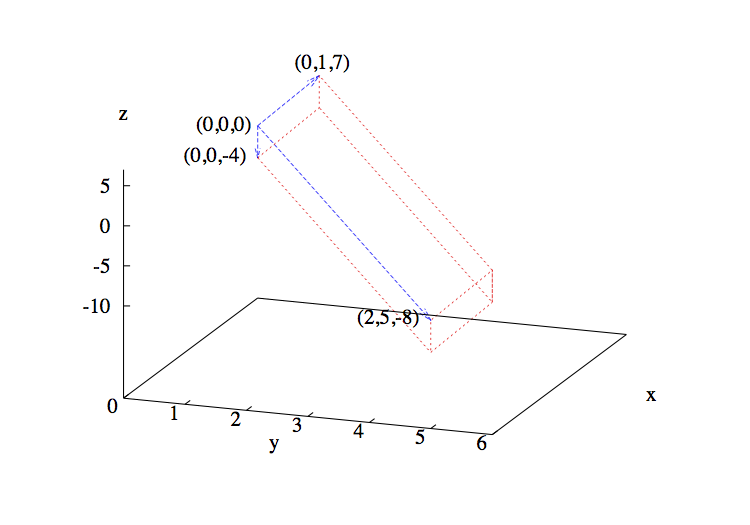

In [3]:
Image(filename='images/det-plot.png', width='60%')

The basic procedure in finding a determinant of a matrix larger than 2
$\times$ 2 is to calculate the product of the non-zero entries in each
of the *permutations* of the matrix, and then add them together. A
permutation of a matrix $A$ is a matrix of the same size with one
element from each row and column of $A$. The sign of each permutation is
$+$ or $-$ depending on whether the permutation is odd or even. This is
illustrated in the following example …

*Example Seven*
--------------

> $$I = \left[ \begin{array}{ccc}  1 & 2 & 3 \\
                                  4 & 5 & 6 \\
                                  7 & 8 & 9  \end{array}  \right]$$

> will have the following permutations:

> $$\begin{array}{cccccc}
+\left[ \begin{array}{ccc}  1 &   &   \\
                             & 5 &   \\
                             &   & 9  \end{array}  \right]
& , &
+\left[ \begin{array}{ccc}    & 2 &   \\
                             &   & 6 \\
                           7 &   &    \end{array}  \right]
& , &
+\left[ \begin{array}{ccc}    &   & 3 \\
                           4 &   &   \\
                             & 8 &    \end{array}  \right]
& ,  \\  \\
-\left[ \begin{array}{ccc}  1 &   &   \\
                             &   & 6 \\
                             & 8 &    \end{array}  \right]
& , &
-\left[ \begin{array}{ccc}    & 2 &   \\
                           4 &   &   \\
                             &   & 9  \end{array}  \right]
& , &
-\left[ \begin{array}{ccc}    &   & 3 \\
                             & 5 &   \\
                           7 &   &    \end{array}  \right]
& .
\end{array}$$

> The determinant of the above matrix is then given by $$\begin{eqnarray}
det(A) &=& +1\cdot 5\cdot 9 +  2 \cdot 6 \cdot 7 + 3 \cdot 4 \cdot 8 - 1
\cdot 6 \cdot 8 - 2 \cdot 4 \cdot 9 - 3 \cdot 5 \cdot 7\\
&=& 0\end{eqnarray}$$

For each of the following matrices, determine whether or not it has an
inverse:

1.  $$A = \left[ \begin{array}{rrr}    3 & -2 &  1 \\
                                         1 &  5 & -1 \\
                                        -1 &  0 &  0    \end{array} \right]$$

2.  $$B = \left[ \begin{array}{rrr}    4 & -6 &  1 \\
                                         1 & -3 &  1 \\
                                         2 &  0 & -1    \end{array} \right]$$

3.  Try to solve this by yourself first, and use Python to check your
    answer:

    $$C = \left[ \begin{array}{rrrr}  4 & -2 & -7 &  6   \\
                                       -3 &  0 &  1 &  0   \\
                                       -1 & -1 &  5 & -1   \\
                                        0 &  1 & -5 &  3
    \end{array} \right]$$

The solutions to these exercises are available [here](http://clouds.eos.ubc.ca/~phil/numeric/html_files/lab3_files/quizzes/det/det.html)

After solving the questions by hand, you can use Python to check your
answer.

<div align='right'>
<span style='font-size:7em'>
[&#x1F43E;](#Numpy-and-Python-with-Matrices)</span>
</div>


2.7 Computational cost of Gaussian elimination
------------------------------------------
[lab3:sec:cost]: (#2.7-Computational-cost-of-Gaussian-elimination)

Although Gaussian elimination is a basic and relatively simple technique
to find the solution of a linear system, it is a costly algorithm. Here
is an operation count of this method:

For a $n \times n$ matrix, there are two kinds of operations to
consider:

1.  <span>division ( *div*)</span> - to find the multiplier from a
    chosen pivot

2.  <span>multiplication-subtraction ( *mult/sub* )</span> - to
    calculate new entries for the matrix

Note that an addition or subtraction operation has negligible cost in
relation to a multiplication or division operation. So the subtraction
in this case can be treated as one with the multiplication operation.
The first pivot is selected from the first row in the matrix. For each
of the remaining rows, one div and $(n-1)$ mult/sub operations are used
to find the new entries. So there are $n$ operations performed on each
row. With $(n-1)$ rows, there are a total of $n(n-1) = n^{2}-n$
operations associated with this pivot.

Since the subtraction operation has negligible cost in relation to the
multiplication operation, there are $(n-1)$ operations instead of
$2(n-1)$ operations.
For the second pivot, which is selected from the second row of the
matrix, similar analysis is applied. With the remaining $(n-1)
\times (n-1)$ matrix, each row has one div and $(n-2)$ mult/sub
operations. For the whole process, there are a total of $(n-1)(n-2) =
(n-1)^{2} - (n-1)$ operations.\

For the rest of the pivots, the number of operations for a remaining
$k \times k$ matrix is $k^{2} - k$.\

The following is obtained when all the operations are added up:

$$\begin{array}{l} 
(1^{2}+\ldots +n^{2}) - (1+\ldots +n) \\ \\
= \frac{n(n+1)(2n+1)}{6} - \frac{n(n+1)}{2} \\ \\
= \frac{n^{3}-n}{3} \\ \\
\approx O(n^{3}) 
\end{array}$$

As one can see, the Gaussian elimination is an $O(n^{3})$ algorithm. For
large matrices, this can be prohibitively expensive. There are other
methods which are more efficient, e.g. see [Section 4. Iterative Methods](#4.-Iterative-Methods). 

*Problem One*
-------------
[lab3:sec2:carbon]:(#Problem-One)

Consider a very simple three box model of the movement of a pollutant in
the atmosphere, fresh-water and ocean. The mass of the atmosphere is MA
(5600 x 10$^{12}$ tonnes), the mass of the fresh-water is MF (360 x
10$^{12}$tonnes) and the mass of the upper layers of the ocean is MO
(50,000 x 10$^{12}$ tonnes). The amount of pollutant in the atmosphere
is A, the amount in the fresh water is F and the amount in the ocean is
O.

The pollutant is going directly into the atmosphere at a rate P1 = 1000
tonnes/year and into th efresh-water system at a rate P2 = 2000
tonnes/year. The pollutant diffuses between the atmosphere and ocean at
a rate depending linearly on the difference in concentration with a
diffusion constant L1 = 200 tonnes/year. The diffusion between the
fresh-water system and the atmosphere is faster as the fresh water is
shallower, L2 = 500 tonnes/year. The fresh-water system empties into the
ocean at the rate of Q = 36 x 10$^{12}$ tonnes/year. Lastly the
pollutant decays (like radioactivity) at a rate L3 = 0.05 /year.

See the graphical presentation of the cycle described above in
Figure [Box Model](#Figure-Box-Model) Schematic for Problem 1.

-   a\) Consider the steady state. There is no change in A, O, or F. Write
    down the three linear governing equations. Write the equations as an
    augmented matrix. Use Octave to find the solution.

-   b\) Show mathematically that there is no solution to this problem with L3
    = 0. Why, physically, is there no solution?

-   c\) Show mathematically that there is an infinite number of solutions if
    L3 = 0 and P1 = P2 = 0. Why, physically?

-   d\) For part c) above, what needs to be specified in order to determine a
    single physical solution. How would you put this in the matrix equation.

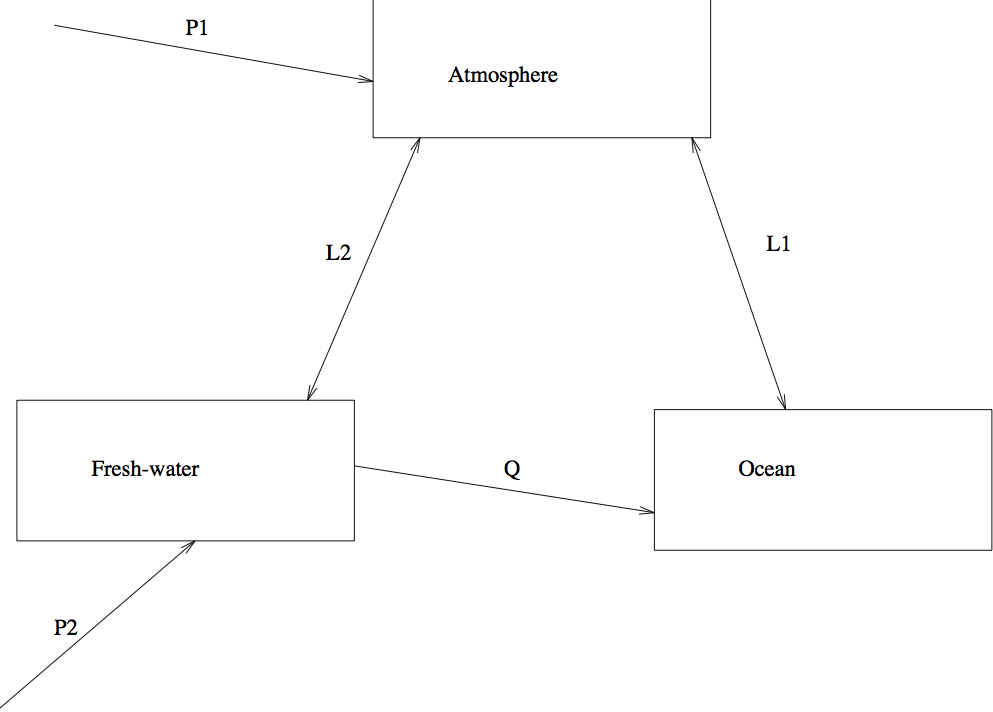

In [4]:
Image(filename='images/C_cycle_problem.png', width='60%')

<div id="Figure-Box-Model">
**Figure Box Model:** Schematic for [Problem One](#Problem-One).
</div>

#3. Eigenvalue Problems

This section is a review of eigenvalues and eigenvectors.

##3.1 Characteristic Equation
[lab3:sec:eigval]: (#3.1-Characteristic-Equation)

The basic equation for eigenvalue problems is the characteristic
equation, which is:

$$\det( A - \lambda I ) = 0$$

where $A$ is a square matrix, I is an identity the same size as $A$, and
$\lambda$ is an eigenvalue of the matrix $A$.

In order for a number to be an eigenvalue of a matrix, it must satisfy
the characteristic equation, for example:

###*Example Eight*

> Given

> $$A = \left[ \begin{array}{rr}  3 & -2 \\ -4 & 5  \end{array} \right]$$

> To find the eigenvalues of $A$, you need to solve the characteristic
equation for all possible $\lambda$.

> $$\begin{array}{ccl}
0 & = & \det (A - \lambda I)  \\
& = & \begin{array}{cccc}
      \det & \left( 
      \left[ \begin{array}{rr}  3 & -2 \\ -4 & 5  \end{array} \right] \right. &
      - &
      \lambda \left. \left[ \begin{array}{rr} 1 & 0 \\ 0 & 1 \end{array} \right]   \right)
    \end{array}   \\  \\
& = & \begin{array}{cc}
      \det & 
      \left[ \begin{array}{cc} 3-\lambda & -2 \\ -4 & 5-\lambda
             \end{array}  \right]
    \end{array}  \\  \\
& = & \begin{array}{ccc} (3-\lambda)(5-\lambda) & - & (-2)(-4) 
    \end{array}  \\  \\
& = & (\lambda - 1)(\lambda - 7)  \\ \\
\end{array}$$

> So, $\lambda = 1 \mbox{ or } 7$, i.e. the eigenvalues of the matrix $A$
are 1 and 7.

> You can use Python to check this answer.

Find the eigenvalues of the following matrix:

$$B = \left[
   \begin{array}{ccc}  3 & 2 & 4 \\ 2 & 0 & 2 \\ 4 & 2 & 3
   \end{array}    \right]$$

The solution to this problem is available [here](http://clouds.eos.ubc.ca/~phil/numeric/html_files/lab3_files/quizzes/char/char.html)

After solving the questions by hand, you can use Python to check your
answer.

<div align='right'>
<span style='font-size:7em'>
[&#x1F43E;](#Numpy-and-Python-with-Matrices)</span>
</div>


### 3.1.1 Condition Number
[lab3.sec.cond]: (#3.1.1-Condition-Number)

The eigenvalues of a matrix $A$ can be used to calculate an
approximation to the condition number $K$ of the matrix, i.e.

$$K \approx \left|  \frac{\lambda_{max}}{\lambda_{min}}  \right|$$

where $\lambda_{max}$ and $\lambda_{min}$ are the maximum and minimum
eigenvalues of $A$. When $K$ is large, i.e. the $\lambda_{max}$ and
$\lambda_{min}$ are far apart, then $A$ is ill-conditioned.

The mathematical definition of $K$ is

$$K = \|A\|\|A^{-1}\|$$

where $\|\cdot\|$ represents the norm of a matrix.

There are a few norms which can be chosen for the formula. The default one used
in Python for finding $K$ is the 2-norm of the matrix. To see how to
compute the norm of a matrix, see a linear algebra text. Nevertheless,
the main concern here is the formula, and the fact that this can be very
expensive to compute. Actually, the computing of $A^{-1}$ is the costly
operation.

Note: In Python, the results from the function *cond*($A$) can have
round-off errors.

For the matrices in this section (A from Example 8 and B just below it) for which you have 
found the
eigenvalues, use the built-in Python function *np.linalg.cond*($A$) to find $K$,
and compare this result with the $K$ approximated from the eigenvalues.


##3.2 Eigenvectors

Another way to look at the characteristic equation is using vectors
instead of determinant. For a number to be an eigenvalue of a matrix, it
must satisfy this equation:

$$( A - \lambda I ) x = 0$$

where $A$ is a $n \times n$ square matrix, $I$ is an identity matrix the
same size as $A$, $\lambda$ is an eigenvalue of $A$, and $x$ is a
non-zero vector associated with the particular eigenvalue that will make
this equation true. This vector is the eigenvector. The eigenvector is
not necessarily unique for an eigenvalue. This will be further discussed
below after the example.

The above equation can be rewritten as:

$$A x = \lambda x$$

For each eigenvalue of $A$, there is a corresponding eigenvector. Below
is an example.

*Example Nine*
-------------

> Following the example from the previous section:

> $$A = \left[ \begin{array}{rr}  3 & -2 \\ -4 & 5  \end{array} \right]$$

> The eigenvalues, $\lambda$, for this matrix are 1 and 7. To find the
eigenvectors for the eigenvalues, you need to solve the equation:

> $$( A - \lambda I ) x = 0.$$ 

> This is just a linear system $A^{\prime}x = b$, where
$A^{\prime} = ( A - \lambda I )$, $b = 0$. To find the eigenvectors, you
need to find the solution to this augmented matrix for each $\lambda$
respectively,

> $$\begin{array}{cl}
& ( A - \lambda I ) x = 0 \ \ \ \ \ \ \ \ {\rm where} \ \ \ \ \ \ \lambda = 1 \\
\; & \; \\
\rightarrow & 
\left( \begin{array}{ccc} 
        \left[ \begin{array}{rr}  3 & -2 \\ -4 & 5 \end{array} \right] 
        & - &
        1 \left[ \begin{array}{cc} 1 & 0 \\ 0 & 1 \end{array} \right]
\end{array} \right) x = 0   \\   \\
\rightarrow &
\left[ \begin{array}{cc}
    \begin{array}{rr}  2 & -2 \\ -4 & 4 \end{array}
    & \left| \begin{array}{c} 0 \\ 0  \end{array}  \right]
\end{array}   \right.  \\  \\ 
\rightarrow &
\left[ \begin{array}{cc}
    \begin{array}{rr}  1 & -1 \\ 0 & 0 \end{array}
    & \left| \begin{array}{c} 0 \\ 0  \end{array}  \right]
\end{array}   \right.
\end{array}$$

> Reading from the matrix,

> $$\begin{array}{ccccc} x_1 & - & x_2 & = & 0  \\
                            &   &   0 & = & 0 \end{array}$$

> As mentioned before, the eigenvector is not unique for a given
eigenvalue. As seen here, the solution to the matrix is a description of
the direction of the vectors that will satisfy $Ax = \lambda x$. Letting
$x_1 = 1$, then $x_2 = 1$. So the vector (1, 1) is an eigenvector for
the matrix $A$ when $\lambda = 1$. (So is (-1,-1), (2, 2), etc)\

> In the same way for $\lambda = 7$, the solution is

> $$\begin{array}{ccccc} x_1 & + & 2x_2 & = & 0  \\
                            &   &    0 & = & 0 \end{array}$$

> So an eigenvector here is x = (2, -1).

> Using Python:

    A = np.array([[3, -2], [-4, 5]])
    lamb, x = np.linalg.eig(A)
    print(lamb)
    print (x)

    [ 1.  7.]
    [[-0.70710678  0.4472136 ]
     [-0.70710678 -0.89442719]]

> Matrix $x$ is the same size a $A$ and vector $lamb$ is the size of one dimension of $A$. Each column of
$x$ is a unit eigenvector of $A$, and $lamb$ values
are the eigenvalues of $A$. Reading from the result, for $\lambda$ = 1,
the corresponding unit eigenvector is (-0.70711, -0.70711). The answer
from working out the example by hand is (1, 1), which is a multiple of
the unit eigenvector from Python.

> (The unit eigenvector is found by dividing the eigenvector by its
magnitude. In this case, $\mid$(1,1)$\mid$ = $\sqrt{1^2 +
  1^2}$ = $\sqrt{2}$, and so the unit eigenvector is
($\frac{1}{\sqrt{2}}, \frac{1}{\sqrt{2}}$) ).

> Remember that the solution for an eigenvector is not the unique answer;
it only represents a *direction* for an eigenvector corresponding to a
given eigenvalue.

What are the eigenvectors for the matrix $B$ from the previous section?

$$B = \left[
   \begin{array}{ccc}  3 & 2 & 4 \\ 2 & 0 & 2 \\ 4 & 2 & 3
   \end{array}    \right]$$

The solution to this problem is available [here](http://clouds.eos.ubc.ca/~phil/numeric/html_files/lab3_files/quizzes/eigvec/eigvec.html)

After solving the questions by hand, you can use Python to check your
answer.

<div align='right'>
<span style='font-size:7em'>
[&#x1F43E;](#Numpy-and-Python-with-Matrices)</span>
</div>

Although the method used here to find the eigenvalues is a direct way to
find the solution, it is not very efficient, especially for large
matrices. Typically, iterative methods such as the Power Method or the
QR algorithm are used (see a linear algebra text such as [Strang (1988)](#Ref:Strang88)
for more details).

#4. Iterative Methods
[lab3:sec:iter]:(#4.-Interative-Methods)

So far, the only method we’ve seen for solving systems of linear
equations is Gaussian Elimination (with its pivoting variants), which is
only one of a class of *direct methods*. This name derives from the fact
that the Gaussian Elimination algorithm computes the exact solution
*directly*, in a finite number of steps. Other commonly-used direct
methods are based on matrix decomposition or factorizations different
from the $LU$ decomposition (see Section [2.3.1 Decomposition](#2.3.1-Decomposition)); for
example, the $LDL^T$ and Choleski factorizations of a matrix. When the
system to be solved is not too large, it is usually most efficient to
employ a direct technique that minimizes the effects of round-off error
(for example, Gaussian elimination with full pivoting).

However, the matrices that occur in the discretization of differential
equations are typically *very large* and *sparse* – that is, a large
proportion of the entries in the matrix are zero. In this case, a direct
algorithm, which has a cost on the order of $N^3$ multiplicative
operations, will be spending much of its time inefficiently, operating
on zero entries. In fact, there is another class of solution algorithms
called *iterative methods* which exploit the sparsity of such systems to
reduce the cost of the solution procedure, down to order $N^2$ for
*Jacobi’s method*, the simplest of the iterative methods (see Lab \#8 )
and as low as order $N$ (the optimal order) for *multigrid methods*
(which we will not discuss here).

Iterative methods are based on the principle of computing an approximate
solution to a system of equations, where an iterative procedure is
applied to improve the approximation at every iteration. While the exact
answer is never reached, it is hoped that the iterative method will
approach the answer more rapidly than a direct method. For problems
arising from differential equations, this is often possible since these
methods can take advantage of the presence of a large number of zeroes
in the matrix. Even more importantly, most differential equations are
only approximate models of real physical systems in the first place, and
so in many cases, an approximation of the solution is sufficient!!!

None of the details of iterative methods will be discussed in this Lab.
For now it is enough to know that they exist, and what type of problems
they are used for. Neither will we address the questions: *How quickly
does an iterative method converge to the exact solution?*, *Does it
converge at all?*, and *When are they more efficient than a direct
method?* Iterative methods will be discussed in more detail in Lab \#8 ,
when a large, sparse system appears in the discretization of a PDE
describing the flow of water in the oceans.

For even more details on iterative methods, you can also look at [Strang (1988)](#Ref:Strang88) [p. 403ff.], or one of the several books listed in the
Readings section from Lab \#8 .

#5. Solution of an ODE Using Linear Algebra
[lab3:sec:prob]:(#5.-Solution-of-an-ODE-Using-Linear-Algebra)

So far, we’ve been dealing mainly with matrices with dimensions
$4\times 4$ at the greatest. If this was the largest linear system that
we ever had to solve, then there would be no need for computers –
everything could be done by hand! Nevertheless, even very simple
differential equations lead to large systems of equations.

Consider the problem of finding the steady state heat distribution in a
one-dimensional rod, lying along the $x$-axis between 0 and 1. We saw in
Lab \#1  that the temperature, $u(x)$, can be described by a boundary
value problem, consisting of the ordinary differential equation
$$u_{xx} = f(x),$$ along with boundary values $$u(0)=u(1) = 0.$$ The
only difference between this example and the one from Lab \#1 is that
the right hand side function, $f(x)$, is non-zero, which corresponds to
a heat source being applied along the length of the rod. The boundary
conditions correspond to the ends of the rod being held at constant
(zero) temperature – this type of condition is known as a fixed or
*Dirichlet* boundary condition.

If we discretize this equation at $N$ discrete points, $x_i=id$,
$i=0,1,\dots,N$, where $d = 1/N$ is the grid spacing, then the ordinary
differential equation can be approximated at a point $x_i$ by the
following system of linear equations:
<div id='lab3:eq:diff-ode'>
(Discrete Differential Equation)
$$\frac{u_{i+1} - 2u_i+u_{i-1}}{d^2} = f_i,$$ 
</div>
where $f_i=f(x_i)$, and $u_i\approx u(x_i)$
is an approximation of the steady state temperature at the discrete
points. If we write out all of the equations, for the unknown values
$i=1,\dots,N-1$, along with the boundary conditions at $i=0,N$, we
obtain the following set of $N+1$ equations in $N+1$ unknowns:
<div id='lab3:eq:diff-system'>
(Differential System)
$$\begin{array}{ccccccccccc}
  u_0 & &     & &       & &         & &     &=& 0 \\
  u_0 &-&2u_1 &+&  u_2  & &         & &     &=& d^2 f_1\\
      & & u_1 &-& 2u_2  &+& u_3     & &     &=& d^2f_2\\
      & &     & &       & & \dots   & &     &=& \\
      & &     & &u_{N-2}&-& 2u_{N-1}&+& u_N &=& d^2f_{N-1}\\
      & &     & &       & &         & & u_N &=& 0
\end{array}$$
</div>

Remember that this system, like any other linear system, can be written
in matrix notation as

<div id='lab3:eq:dir-system'>
(Differential System Matrix)
$$\underbrace{\left[
      \begin{array}{ccccccccc}
        1&  0  & & \dots  & & & & & 0 \\
        1& {-2} & {1} & {0} & {\dots} & && &  \\
        0& {1} & {-2} &  {1} & {0} & {\dots} & & &  \\
        & {0} & {1}  & {-2} & {1} & {0} & {\dots} & &  \\
        & & & & & & & & \\
        \vdots & & & {\ddots} & {\ddots} & {\ddots} & {\ddots} & {\ddots} & \vdots \\
        & & & & & & & & \\
        & & & {\dots} & {0} & {1} & {-2} & {1} & 0 \\
        & &  & &{\dots} & {0} & {1} & {-2} & 1 \\
        0& & & & & \dots & & 0 & 1      
      \end{array}
    \right]
    }_{A_1}
  \underbrace{\left[
      \begin{array}{c}
        u_0 \\ {u_1} \\ {u_2} \\ {u_3} \\ \ \\ {\vdots} \\ \
        \\ {u_{N-2}} \\ {u_{N-1}} \\ u_N
      \end{array}
    \right]
    }_{U}
  = 
    \underbrace{\left[
      \begin{array}{c}
        0 \\ {d^2 f_1} \\ {d^2 f_2} \\ {d^2 f_3} \\ \ \\
        {\vdots} \\ \ \\ {d^2 f_{N-2}} \\ {d^2 f_{N-1}} \\ 0 
      \end{array}
    \right] 
    }_{F}$$
</div>

or, simply $A_1 U = F$.

One question we might ask is: *How well-conditioned is the matrix
$A_1$?* or, in other words, *How easy is this system to solve?* To
answer this question, we leave the right hand side, and consider only
the matrix and its condition number. The size of the condition number is
a measure of how expensive it will be to invert the matrix and hence
solve the discrete boundary value problem.

###*Problem Two*
[lab3:prob:dirichlet]:(#Problem-Two) 

> a) Using Python, compute the condition number for
the matrix $A_1$ from Equation [Differential System Matrix](#lab3:eq:dir-system) for several values of $N$
between 5 and 50. ( **Hint:** This will be much easier if you write a
small Python function that outputs the matrix $A$ for a given value of
$N$.)

> b\) Can you conjecture how the condition number of $A_1$ depends on $N$?

> c\) Another way to write the system of equations is to substitute the
boundary conditions into the equations, and thereby reduce size of the
problem to one of $N-1$ equations in $N-1$ unknowns. The corresponding
matrix is simply the $N-1$ by $N-1$ submatrix of $A_1$
from Equation [Differential System Matrix](#lab3:eq:dir-system) $$A_2 = \left[
      \begin{array}{ccccccc}
        -2 &  1 &  0 & \dots & && 0 \\
        1 & -2 &  1 & 0 & \dots & & \\
        0 & 1  & -2 & 1 & 0 & \dots &  \\
        & & & & & & \\
        \vdots & & \ddots & \ddots& \ddots & \ddots & \vdots\\
        & & & & & & 0 \\
        & & \dots & 0 & 1 & -2 & 1 \\
        0&  & &\dots & 0 & 1 & -2 \\
      \end{array}
    \right]
$$ Does this change in the matrix make a significant difference in the
condition number?

So far, we’ve only considered zero Dirichlet boundary values,
$u_0=0=u_N$. Let’s look at a few more types of boundary values …

 **Fixed (non-zero) boundary conditions:**

>   If we fixed the solution at the boundary to be some non-zero values,
    say by holding one end at temperature $u_0=a$, and the other at
    temperature $u_N=b$, then the matrix itself is not affected. The
    only thing that changes in Equation [Differential System](#lab3:eq:dir-system) 
    is that
    a term $a$ is subtracted from the right hand side of the second
    equation, and a term $b$ is subtracted from the RHS of the
    second-to-last equation. It is clear from what we’ve just said that
    non-zero Dirichlet boundary conditions have no effect at all on the
    matrix $A_1$ (or $A_2$) since they modify only the right hand side.

 **No-flow boundary conditions:**

>   These are conditions on the first derivative of the temperature
    $$u_x(0) = 0,$$ $$u_x(1) = 0,$$ which are also known as *Neumann*
    boundary conditions. The requirement that the first derivative of
    the temperature be zero at the ends corresponds physically to the
    situation where the ends of the rod are *insulated*; that is, rather
    than fixing the temperature at the ends of the rod (as we did with
    the Dirichlet problem), we require instead that there is no heat
    flow in or out of the rod through the ends.

>    There is still one thing that is missing in the mathematical
    formulation of this problem: since only derivatives of $u$ appear in
    the equations and boundary conditions, the solution is determined
    only up to a constant, and for there to be a unique solution, we
    must add an extra condition. For example, we could set
    $$u \left(\frac{1}{2} \right) = constant,$$ or, more realistically,
    say that the total heat contained in the rod is constant, or
    $$\int_0^1 u(x) dx = constant.$$
    
> Now, let us look at the discrete formulation of the above problem …

> The discrete equations do not change, except for that discrete
    equations at $i=0,N$ replace the Dirichlet conditions in Equation [Differential System](#lab3:eq:diff-system):
    <div id='lab3:eq:neumann-over'>
    (Neumann Boundary Conditions)
    $$u_{-1} - 2u_0 +u_{1} = d^2f_0 \quad {\rm and} \quad
        u_{N-1} - 2u_N +u_{N+1} = d^2f_N $$ 
    </div>
        where we have introduced the
    additional *ghost points*, or *fictitious points* $u_{-1}$ and
    $u_{N+1}$, *lying outside the boundary*. The temperature at these
    ghost points can be determined in terms of values in the interior
    using the discrete version of the Neumann boundary conditions
    $$\frac{u_{-1} - u_1}{2d} = 0 \;\; \Longrightarrow \;\; u_{-1}  = u_1,$$
    $$\frac{u_{N+1} - u_{N-1}}{2d} = 0 \;\; \Longrightarrow \;\; u_{N+1} = u_{N-1}.$$
    Substitute these back into the [Newmann Boundary Conditions](#lab3:eq:neumann-over) to obtain
    $$- 2u_0 + 2 u_1 =d^2 f_0 \quad {\rm and} \quad
         + 2u_{N-1} - 2 u_N =d^2 f_N .$$ In this case, the matrix is an
    $N+1$ by $N+1$ matrix, almost identical to Equation [Differential System Matrix](#lab3:eq:dir-system),
    but with the first and last rows slightly modified $$A_3 = \left[
          \begin{array}{ccccccc}
            -2 &  2 &  0 & \dots & && 0 \\
            1 & -2 &  1 & 0 & \dots & & 0\\
            0 & 1  & -2 & 1 & 0 & \dots & 0\\
            & & & & & & \\
            & & & \ddots& \ddots & \ddots &  \\        
            & & & & & & \\
            0 & & \dots & 0 & 1 & -2 & 1 \\
            0 &  & &\dots & 0 & 2 & -2
          \end{array}
        \right]$$ 
    This system is *not solvable*; that is, the $A_3$ above is
    singular ( *try it in Python to check for yourself … this should be
    easy by modifying the code from [Problem 2](#Problem-Two)).
    This is a discrete analogue of the fact that the continuous solution
    is not unique. The only way to overcome this problem is to add
    another equation for the unknown temperatures.

Physically the reason the problem is not unique is that we don’t know
how hot the rod is. If we think of the full time dependent problem:

1\) given fixed temperatures at the end points of the rod (Dirichlet),
whatever the starting temperature of the rod, eventually the rod will
reach equilibrium. with a temperature smoothly varying between the
values (given) at the end points.

2\) However, if the rod is insulated (Neumann), no heat can escape and
the final temperature will be related to the initial temperature. To
solve this problem we need to know the steady state,

a\) the initial temperature of the rod,

b\) the total heat of the rod,

c\) or a final temperature at some point of the rod.

*Problem Three*
--------------
[lab3:prob:neumann]:(#Problem-Three)

> How can we make the discrete Neumann problem
solvable? Think in terms of discretizing the *solvability conditions*
$u(\frac{1}{2}) = c$ (condition c) above), or $\int_0^1 u(x) dx = c$
(condition b) above), (the integral condition can be thought of as an
*average* over the domain, in which case we can approximate it by the
discrete average $\frac{1}{N}(u_0+u_1+\dots+u_N)=c$). 

> a) Derive the
matrix corresponding to the linear system to be solved in both of these
cases.

> b\) How does the conditioning of the resulting matrix depend on the the
size of the system?

> c\) Is it better or worse than for Dirichlet boundary conditions?

 **Periodic boundary conditions:**

>   This refers to the requirement that the temperature at both ends
    remains the same: $$u(0) = u(1).$$ Physically, you can think of this
    as joining the ends of the rod together, so that it is like a
    *ring*. From what we’ve seen already with the other boundary
    conditions, it is not hard to see that the discrete form of the
    one-dimensional diffusion problem with periodic boundary conditions
    leads to an $N\times N$ matrix of the form $$A_4 = \left[
          \begin{array}{ccccccc}
            -2 &  1 &  0 & \dots & && 1 \\
            1 & -2 &  1 & 0 & \dots & & 0\\
            0 & 1  & -2 & 1 & 0 & \dots & 0\\
            & & & & & & \\
            & & & \ddots& \ddots & \ddots &  \\        
            & & & & & & \\
            0 & & \dots & 0 & 1 & -2 & 1 \\
            1 &  & &\dots & 0 & 1 & -2
          \end{array}
        \right],
    $$ where the unknown temperatures are now $u_i$, $i=0,1,\dots, N-1$.
    The major change to the form of the matrix is that the elements in
    the upper right and lower left corners are now 1 instead of 0. Again
    the same problem of the invertibility of the matrix comes up. This
    is a symptom of the fact that the continuous problem does not have a
    unique solution. It can also be remedied by tacking on an extra
    condition, such as in the Neumann problem above.

*Problem Four*
--------------
[lab3:prob:periodic]: (#Problem-Four) 

> a) Derive the matrix $A_4$ above using the discrete
form [Discrete Differential Equation](#lab3:eq:diff-ode) of the differential equation and the periodic
boundary condition.

> b) For the periodic problem (with the extra integral condition on the
temperature) how does the conditioning of the matrix compare to that for
the other two discrete problems?

#### Summary

As you will have found in these problems, the boundary conditions can
have an influence on the conditioning of a discrete problem.
Furthermore, the method of discretizing the boundary conditions may or
may not have a large effect on the condition number. Consequently, we
must take care when discretizing a problem in order to obtain an
efficient numerical scheme.

##References
</div><div id="Ref:Strang86">
Strang, G., 1986: Introduction to Applied Mathematics. Wellesley-Cambridge Press, Wellesley, MA.
</div>
</div><div id="Ref:Strang88">
Strang, G., 1988: Linear Algebra and its Applications. Harcourt Brace Jovanovich, San Diego, CA, 2nd edition.
</div>

#Numpy and Python with Matrices

**To start, import numpy,**

Enter:

> import numpy as np

**To enter a matrix,** 
$$ A = \left[ \begin{array}{ccc} a, & b, & c \\
                            d, & e, & f \end{array} \right] $$
Enter:

> A = np.array([[a, b, c], [d, e, f]])

**To add two matrices,**
$$ C = A + B$$

Enter:

> C = A + B

**To multiply two matrices,**
$$ C = A \cdot B $$

Enter:

> C = np.dot(A, B)

**To find the tranpose of a matrix,**
$$ C = A^{T} $$

Enter:

> C = A.tranpose()

**To find the condition number of a matrix,**

> K = np.linalg.cond(A)

**To find the inverse of a matrix,**
$$ C = A^{-1} $$

Enter:

> C = np.linalg.inv(A)

**To find the determinant of a matrix,**
$$ K = |A|$$

Enter:

> K = np.linalg.det(A)

**To find the eigenvalues of a matrix,**

Enter:

> lamb = np.linalg.eigvals(A)

**To find the eigenvalues (lamb) and eigenvectors (x) of a matrix,**

Enter:

> lamb, x = np.linalg.eig(A)

**To print a matrix,**
$$C$$

Enter:

> print (C)

Glossary
========
[glossary.unnumbered]:(#Glossary)

**A** 

augmented matrix

>   The $ m \times (n+1) $ matrix representing a linear system,
    $Ax = b$, with the right hand side vector appended to the
    coefficient matrix: $$\left[ 
    \begin{array}{cc}
            \begin{array}{ccccc} 
                    a_{11} & & \ldots & & a_{1n} \\
                    \vdots & & \ddots & & \vdots \\
                    a_{m1} & & \ldots & & a_{mn} 
            \end{array}
    &
            \left| 
            \begin{array}{rc}
                    & b_{1} \\ & \vdots \\ & b_{m}
            \end{array} 
            \right. 
    \end{array}
    \right]$$

>    The right most column is the right hand side vector or augmented
    column.

**C** 

characteristic equation

>   The equation:
    $$\det(A - \lambda I) = 0 , \ \ \ \  or \ \ \ \ Ax = \lambda x$$
    where $A$ is a *square matrix*, $I$ is the *identity matrix*,
    $\lambda$ is an *eigenvalue* of $A$, and $x$ is the corresponding
    *eigenvector* of $ \lambda$.

coefficient matrix

>   A $m \times n$ matrix made up with the coefficients $a_{ij}$ of the
    $n$ unknowns from the $m$ equations of a set of linear equations,
    where $i$ is the row index and $j$ is the column index: $$\left[
    \begin{array}{ccccccc}
                    & a_{11} & & \ldots & & a_{1n} & \\
                    & \vdots & & \ddots & & \vdots & \\
                    & a_{m1} & & \ldots & & a_{mn} &
            \end{array}
    \right]$$

condition number

>   A number, $K$, that refers to the sensitivity of a *nonsingular*
    matrix, $A$, i.e. given a system $Ax = b$, $K$ reflects whether
    small changes in $A$ and $b$ will have any effect on the solution.
    The matrix is well-conditioned if $K$ is close to one. The number is
    described as: $$K(A) = \|A\| \|A^{-1}\| 
            \ \ \ \  or \ \ \ \
    K(A) = \frac{\lambda_{max}}{\lambda_{min}}$$ where $\lambda_{max}$
    and $\lambda_{min}$ are largest and smallest *eigenvalues* of $A$
    respectively.

**D** 

decomposition

>   Factoring a matrix, $A$, into two factors, e.g., the Gaussian
    elimination amounts to factoring $A$ into a product of two matrices.
    One is the lower triangular matrix, $L$, and the other is the upper
    triangular matrix, $U$.

diagonal matrix

>   A square matrix with the entries $a_{ij} = 0 $ whenever $ i \neq j$.

**E**

eigenvalue

>   A number, $\lambda$, that must satisfy the *characteristic equation*
    $ \det(A - \lambda I) = 0.$

eigenvector

>   A vector, $x$, which corresponds to an *eigenvalue* of a *square
    matrix* $A$, satisfying the characteristic equation:
    $$Ax = \lambda x .$$

**H** 

homogeneous equations

>   A set of linear equations, $Ax = b$ with the zero vector on the
    right hand side, i.e. $b = 0$.

**I** 

inhomogeneous equations

>   A set of linear equations, $Ax = b$ such that $b \neq 0$.

identity matrix

>   A *diagonal matrix* with the entries $a_{ii} = 1$:
    $$\left[ \begin{array}{ccccccc}
            & 1 & 0 & \ldots & \ldots & 0 &  \\
            & 0 & 1 & \ddots & & \vdots & \\
            & \vdots & \ddots & \ddots & \ddots & \vdots \\
            & \vdots & & \ddots & 1 & 0 & \\
            & 0 & \ldots & \ldots & 0 & 1 &
       \end{array} \right]$$

ill-conditioned matrix

>   A matrix with a large *condition number*, i.e., the matrix is not
    well-behaved, and small errors to the matrix will have great effects
    to the solution.

invertible matrix

>   A square matrix, $A$, such that there exists another matrix,
    $A^{-1}$, which satisfies:
    $$AA^{-1} = I \ \ \ \ and \ \ \ \  A^{-1}A = I$$

>    The matrix, $A^{-1}$, is the *inverse* of $A$. An invertible matrix
    is *nonsingular*.

**L** 

linear system

>   A set of $m$ equations in $n$ unknowns: $$\begin{array}{ccccccc}
    a_{11}x_{1} & + & \ldots & + & a_{1n}x_{n} & = & b_{1} \\
    a_{21}x_{1} & + & \ldots & + & a_{2n}x_{n} & = & b_{2} \\
                &   & \vdots &   &             &   & \vdots \\
    a_{m1}x_{1} & + & \ldots & + & a_{mn}x_{n} & = & b_{m} 
    \end{array}$$ with unknowns $x_{i}$ and coefficients
    $a_{ij}, b_{j}$.

lower triangular matrix

>   A square matrix, $L$, with the entries $l_{ij} = 0$, whenever
    $j > i$: $$\left[
    \begin{array}{ccccccc}
             & * & 0 & \ldots & \ldots & 0 & \\
             & * & * & \ddots & & \vdots & \\
             & \vdots &  & \ddots & \ddots & \vdots & \\
             & \vdots &  & & * & 0 & \\
             & * & \ldots & \ldots & \ldots & * &
    \end{array}
    \right]$$

**N** 

nonsingular matrix

>   A square matrix,$A$, that is invertible, i.e. the system $Ax = b$
    has a *unique solution*.

**S** 

singular matrix

>   A $n \times n$ matrix that is degenerate and does not have an
    inverse (refer to *invertible*), i.e., the system $Ax = b$ does not
    have a *unique solution*.

sparse matrix

>   A matrix with a high percentage of zero entries.

square matrix

>   A matrix with the same number of rows and columns.

**T** 

transpose

>   A $n \times m$ matrix, $A^{T}$, that has the columns of a
    $m \times n$ matrix, $A$, as its rows, and the rows of $A$ as its
    columns, i.e. the entry $a_{ij}$ in $A$ becomes $a_{ji}$ in $A^{T}$,
    e.g.

>    $$A = 
    \left[ \begin{array}{ccc} 1 & 2 & 3 \\ 4 & 5 & 6 \end{array} \right] 
    \ \  \rightarrow \ \ 
    A^{T} = 
    \left[ \begin{array}{cc} 1 & 4 \\ 2 & 5 \\ 3 & 6 \end{array} \right]$$

tridiagonal matrix

>   A square matrix with the entries $a_{ij} = 0$, $| i-j | > 1 $:

>    $$\left[
    \begin{array}{cccccccc}
             & * & * & 0 & \ldots & \ldots & 0 & \\
             & * & * & * & \ddots & & \vdots & \\
             & 0 & * & \ddots & \ddots & \ddots & \vdots & \\
             & \vdots & \ddots & \ddots & \ddots & * & 0 & \\
             & \vdots & & \ddots & * & * & * & \\
             & 0 & \ldots & \ldots & 0 & * & * &
    \end{array}
    \right]$$

**U** 

unique solution

>   There is only solution, $x$, that satisfies a particular linear
    system, $Ax = b$, for the given $A$. That is, this linear system has
    exactly one solution. The matrix $A$ of the system is *invertible*
    or *nonsingular*.

upper triangular matrix

>   A square matrix, $U$, with the entries $u_{ij} = 0$ whenever
    $i > j$:

>    $$\left[
    \begin{array}{ccccccc}
             & * & \ldots & \ldots & \ldots & * & \\
             & 0 & * &  &  & \vdots & \\
             & \vdots & \ddots & \ddots &  & \vdots & \\
             & \vdots &  & \ddots & * & * & \\
             & 0 & \ldots & \ldots & 0 & * &
    \end{array}
    \right]$$
